In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Neuron():
    '''Initialize a Neuron'''

    def __init__(self, duration=2, dt=1e-4):
        self.duration = duration
        self.dt = dt
        self.n_bins = int(duration / dt)
        self.V = np.zeros(self.n_bins)
        self.Si = np.zeros(self.n_bins)

    '''Poisson_spike method can output poisson spike trains'''

    def poisson_spike(self, rx=10):
        # make up a random spike train
        self.Si = np.random.binomial(1, rx * self.dt, size=self.n_bins) / self.dt
        return self.Si

    '''Euler intergrate'''

    def integrate_once(self, Sj, t, tau=20e-3, V_th=1, V_set=20, V_reset=0):
        if self.V[t] == V_set:
            self.Si[t] = 1 / self.dt
            self.V[t + 1] = V_reset
        else:
            self.V[t + 1] = self.V[t] + self.dt * (-self.V[t] / tau + Sj[t])
        if self.V[t + 1] >= V_th:
            self.V[t + 1] = V_set

    '''Action, no return'''

    def recieve_once(self, Sj, t):
        self.integrate_once(Sj, t)


In [ ]:
# some constant
W = 1.5     # when w = 1.58 the average of spike is around 10.1
rx = 10  # Hz
E = 100  # numbers of excitatory input
I = 100  # numbers of inhibitory input
duration = 1
dt = 1e-4
W_e = W / np.sqrt(E)
W_i = W / np.sqrt(I)

In [ ]:

def generate_neuron_with_EI(W, rx, E, I, duration, dt, W_e, W_I):
    # to generate a neuron that receives excitatory and inhibitory inputs

    x = Neuron(duration, dt)
    Exci = []
    Inhi = []
    for i in range(E):
        Exci.append(Neuron(duration, dt))
        Exci[i].poisson_spike(rx)
        Exci[i].Si = Exci[i].Si * W_e
    for i in range(I):
        Inhi.append(Neuron(duration, dt))
        Inhi[i].poisson_spike(rx)
        Inhi[i].Si = Inhi[i].Si * W_i

    input = np.zeros(x.n_bins)
    for i in range(x.n_bins):
        for e in range(E):
            input[i] = input[i] + Exci[e].Si[i]
        for j in range(I):
            input[i] = input[i] - Inhi[j].Si[i]

    for t in range(x.n_bins - 1):
        x.recieve_once(input, t)

    return x


In [ ]:

trials = 100
x = []
S = []
V = []

for i in range(trials):
    x.append(generate_neuron_with_EI(W, rx, E, I, duration, dt, W_e, W_i))
    S.append(x[i].Si * dt)
    V.append(x[i].V)


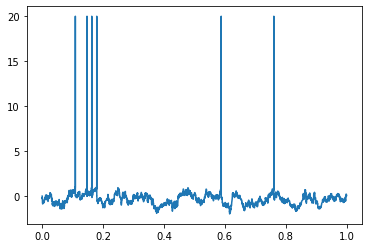

In [ ]:
# plot one of the neurons
plt.plot(np.linspace(0, duration, int(duration / dt)), V[3])
plt.show()

In [ ]:
# calculate some constant and fano factor
spike = np.sum(S, axis=1)
print("mean of spikes:", spike.mean())
print("variance of spikes:", spike.var())
print("fano factor:", spike.var() / spike.mean())

mean of spikes: 9.28
variance of spikes: 9.9016
fano factor: 1.0669827586206897


mu of membrane is  -0.19323505525847726
sigma sqaure of membrane is  0.6688527371399212


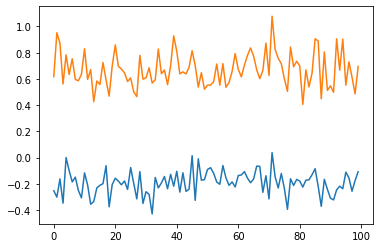

In [ ]:
# calculate the mean and variance of membrane potential
mu = np.mean(V, axis=1)
sigma_sq = np.var(V, axis=1)
print("mu of membrane is ", mu.mean())
print("sigma sqaure of membrane is ", sigma_sq.mean())

# plot the mean and variance of the membrane potential
plt.plot(mu)
plt.plot(sigma_sq)
plt.show()


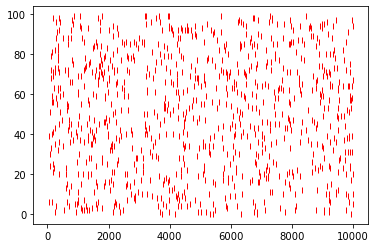

In [ ]:
# plot every neuron's spike
for i in range(int(duration / dt)):
    for j in range(trials):
        if S[j][i] > 0:
            plt.plot(i, j, '|', c='r')


plt.show()